In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

import splitfolders

In [3]:
dataset = 'C:/Users/JP/Desktop/Kidney cancer/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

split the two folder train and val

In [4]:
# splitfolders.ratio(
#     "C:/Users/JP/Desktop/Kidney cancer/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
#    output="./dataset",
#    seed=7,
#    ratio=(0.8,0.2)
# )

In [5]:
train = 'C:/Users/JP/Desktop/Kidney cancer/dataset/train'
val = 'C:/Users/JP/Desktop/Kidney cancer/dataset/val'

In [6]:
batch_size = 1
epochs = 5
img_height = 200
img_width = 200

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 5887 images belonging to 2 classes.


In [9]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=val,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1473 images belonging to 2 classes.


In [10]:
import warnings
 

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [11]:
from tensorflow.keras.applications.mobilenet import MobileNet


In [12]:
 base_model = MobileNet(weights = 'imagenet', include_top=False, input_shape=(200, 200, 3))


In [13]:
base_model.trainable = False

In [14]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 12, 12, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 12, 12, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 12, 12, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 12, 12, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 12, 12, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 12, 12, 512)       262144    
                                                                 
 conv_pw_9

In [15]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D


In [16]:
mobilenet = tf.keras.models.Sequential()

mobilenet.add(base_model)
mobilenet.add(GlobalAveragePooling2D())
mobilenet.add(Dense(2, activation = 'softmax'))
mobilenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2050      
                                                                 
Total params: 3,230,914
Trainable params: 2,050
Non-trainable params: 3,228,864
_________________________________________________________________


In [17]:
mobilenet.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = mobilenet.fit(train_data_gen, epochs=2,
validation_data= val_data_gen,)

Epoch 1/2
5887/5887 [==============================] - 152s 25ms/step - loss: 0.1404 - accuracy: 0.9441 - val_loss: 0.0711 - val_accuracy: 0.9803
Epoch 2/2
5887/5887 [==============================] - 153s 26ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0145 - val_accuracy: 0.9959


In [20]:
mobilenet.save('kidney.h5')

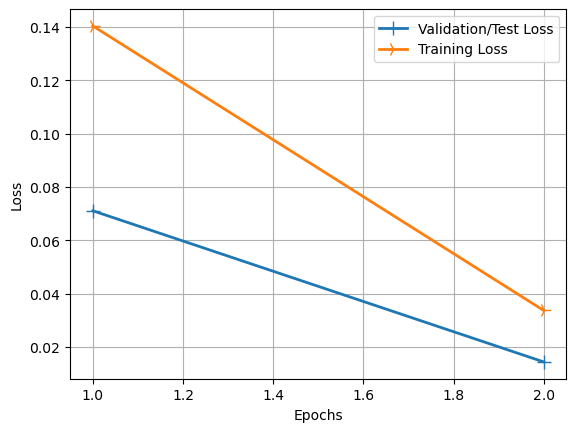

In [21]:


history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

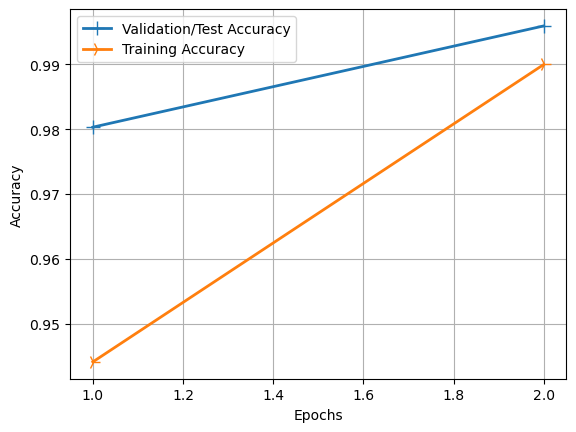

In [22]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
import numpy as np

In [25]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= mobilenet.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

1473/1473 - 29s - 29s/epoch - 20ms/step


In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [28]:
cm_plot_labels = ['Normal','Tumor']

Confusion matrix, without normalization
[[1012    4]
 [   2  455]]
Accuracy: 0.996
Precision: 0.991
Recall: 0.996
F-Measure: 0.996


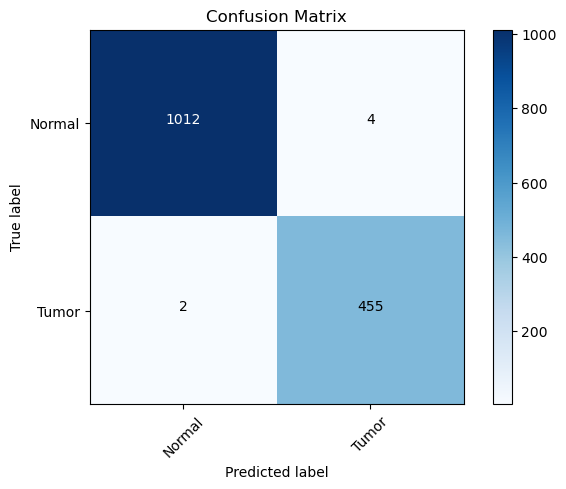

In [29]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)